# Learning Curves

In [9]:
from sklearn.learning_curve import learning_curve
from classification import dao
import pickle
import numpy as np
from data import DataAccess, LabelGetter
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
clf_alc = pickle.load(open('pickles/clf_alc_UPDATED.p', 'rb'))

In [5]:
clf_fpa = pickle.load(open('pickles/clf_fpa_UPDATED.p', 'rb'))

In [12]:
clf_fpl = pickle.load(open('pickles/clf_fpl_UPDATED.p', 'rb'))

In [18]:
%%time
Labeled = DataAccess.get_as_dataframe()
L = LabelGetter(Labeled)

Wall time: 4.37 s


In [10]:
# F1 score, 5-fold CV
def plot_learning_curve(clf, X, y, train_pieces=10):
    '''
    train_pieces: number of pts to plot
    '''
    train_size = 1/train_pieces
    train_sizes, train_scores, test_scores = learning_curve(clf_fpl, X, y, scoring='f1_weighted',
                                                            train_sizes=np.arange(train_size, 0.8, train_size), cv=5)
    plt.figure()
    plt.xlabel("Training examples")
    plt.ylabel("F1 Score")
    plt.grid()

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

    plt.legend(loc="best")

    plt.show()
    

# 500 double labeled

~500 first person double labeled tweets, split into train/test. We plot weighted F1 score vs training examples.

In [45]:
verified = pickle.load(open('amt/double_labeled_test.p', 'rb'))
L = LabelGetter(verified)

In [46]:
X, y = L.get_first_person_label()

In [23]:
y.shape

(525,)

C:\Users\Tom Work\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom Work\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom Work\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom Work\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom Work\Anaconda3\lib\site-packages\sk

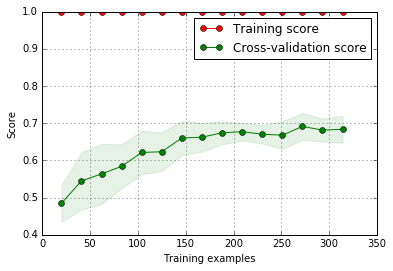

In [47]:
plot_learning_curve(clf_fpl, X, y, train_pieces=20)

# Single Labeled Data

We can compare to the learning curve of the old single labeled ~5000 tweets.

In [48]:
%%time

from data import DataAccess, LabelGetter

Labeled = DataAccess.get_as_dataframe()
L = LabelGetter(Labeled)

Wall time: 2.97 s


In [49]:
X, y = L.get_first_person_label()

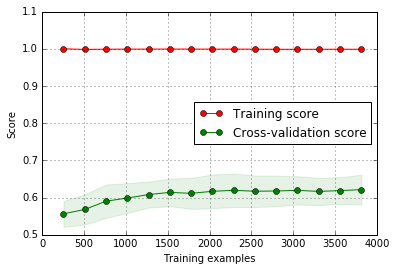

Wall time: 1min 26s


In [50]:
%%time
plot_learning_curve(clf_fpl, X, y, train_pieces=20)

# 1500 double labeled:

In [4]:
agreed = pickle.load(open('amt/double_labeled.p', 'rb'))

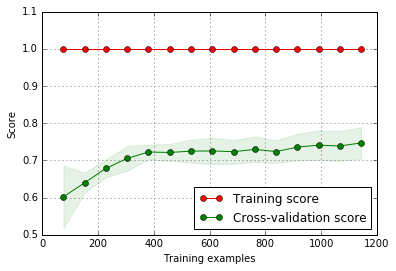

Wall time: 28.6 s


In [13]:
%%time

L = LabelGetter(agreed)
X, y = L.get_first_person_label()

plot_learning_curve(clf_fpl, X, y, train_pieces=20)